# Tutorial 1 - Machine learning intro

In this tutorial, we'll introduce the **Python** programming language and some of its libraries.

## Package installation with uv and Jupyter

We'll first install the [uv](https://docs.astral.sh/uv/) package manager. We can install Jupyter system-wide with uv by running:

```bash
$ uv tool install jupyterlab
```

We need to create a uv project and connect it to Jupyter:
```bash
$ uv init
$ uv add --dev ipykernel
$ uv run ipython kernel install --user --env VIRTUAL_ENV $(pwd)/.venv --name=nsn
```

In order for the newly installed Jupyter kernel to be available, we need to restart Jupyter.

Finally, we can install the required packages:
```bash
$ uv add matplotlib numpy scikit-learn torch torch-geometric torchvision
$ uv add torch-cluster -f https://data.pyg.org/whl/torch-2.8.0+cpu.html
```

## Task 1

Run the aforementioned steps to create a package and have the next cell run without errors. It should print something like `scikit-learn version: 1.7.2`.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn

print("numpy version:", np.__version__)
print("scikit-learn version:", sklearn.__version__)

numpy version: 2.3.3
scikit-learn version: 1.7.2


## Learning types

We can roughly divide machine learning into several basic categories:
- Supervised learning: The model is trained on data containing a sample of both its inputs as well as the intended outputs (labels)
- Unsupervised learning: The model is trained on a sample of the input data only and generally tries to find structure or patterns in the data
- Reinforcement learning: The agent is learning to make actions in an environment that maximise its cumulative reward
- Self-supervised learning: A newer approach where the model learns from data by generating its own tasks (pseudo-labels)

### Supervised learning

Supervised learning methods can be described as methods that take an input $\vec{x} \in \mathbb{R}^d$ and predict from it the value $y$. We can further divide them into two sub-categories:

1. **Regression** - The model is predicting a real-valued $y \in \mathbb{R}$
2. **Classification** - The model is assigning the input into one of several *classes*. We can formalise this as predicting one class from a finite set $y \in \{0, 1, \dots K - 1\}$, or as predicting a probability distribution on all the classes.

Typically we have a *training set* $X_\mathrm{train} \in \mathbb{R}^{n \times d}$ in the form of a set of pairs $(\vec{x}, y)$. In the probabilistic paradigm we assume that the training set is a random sample of the underlying probability distribution.

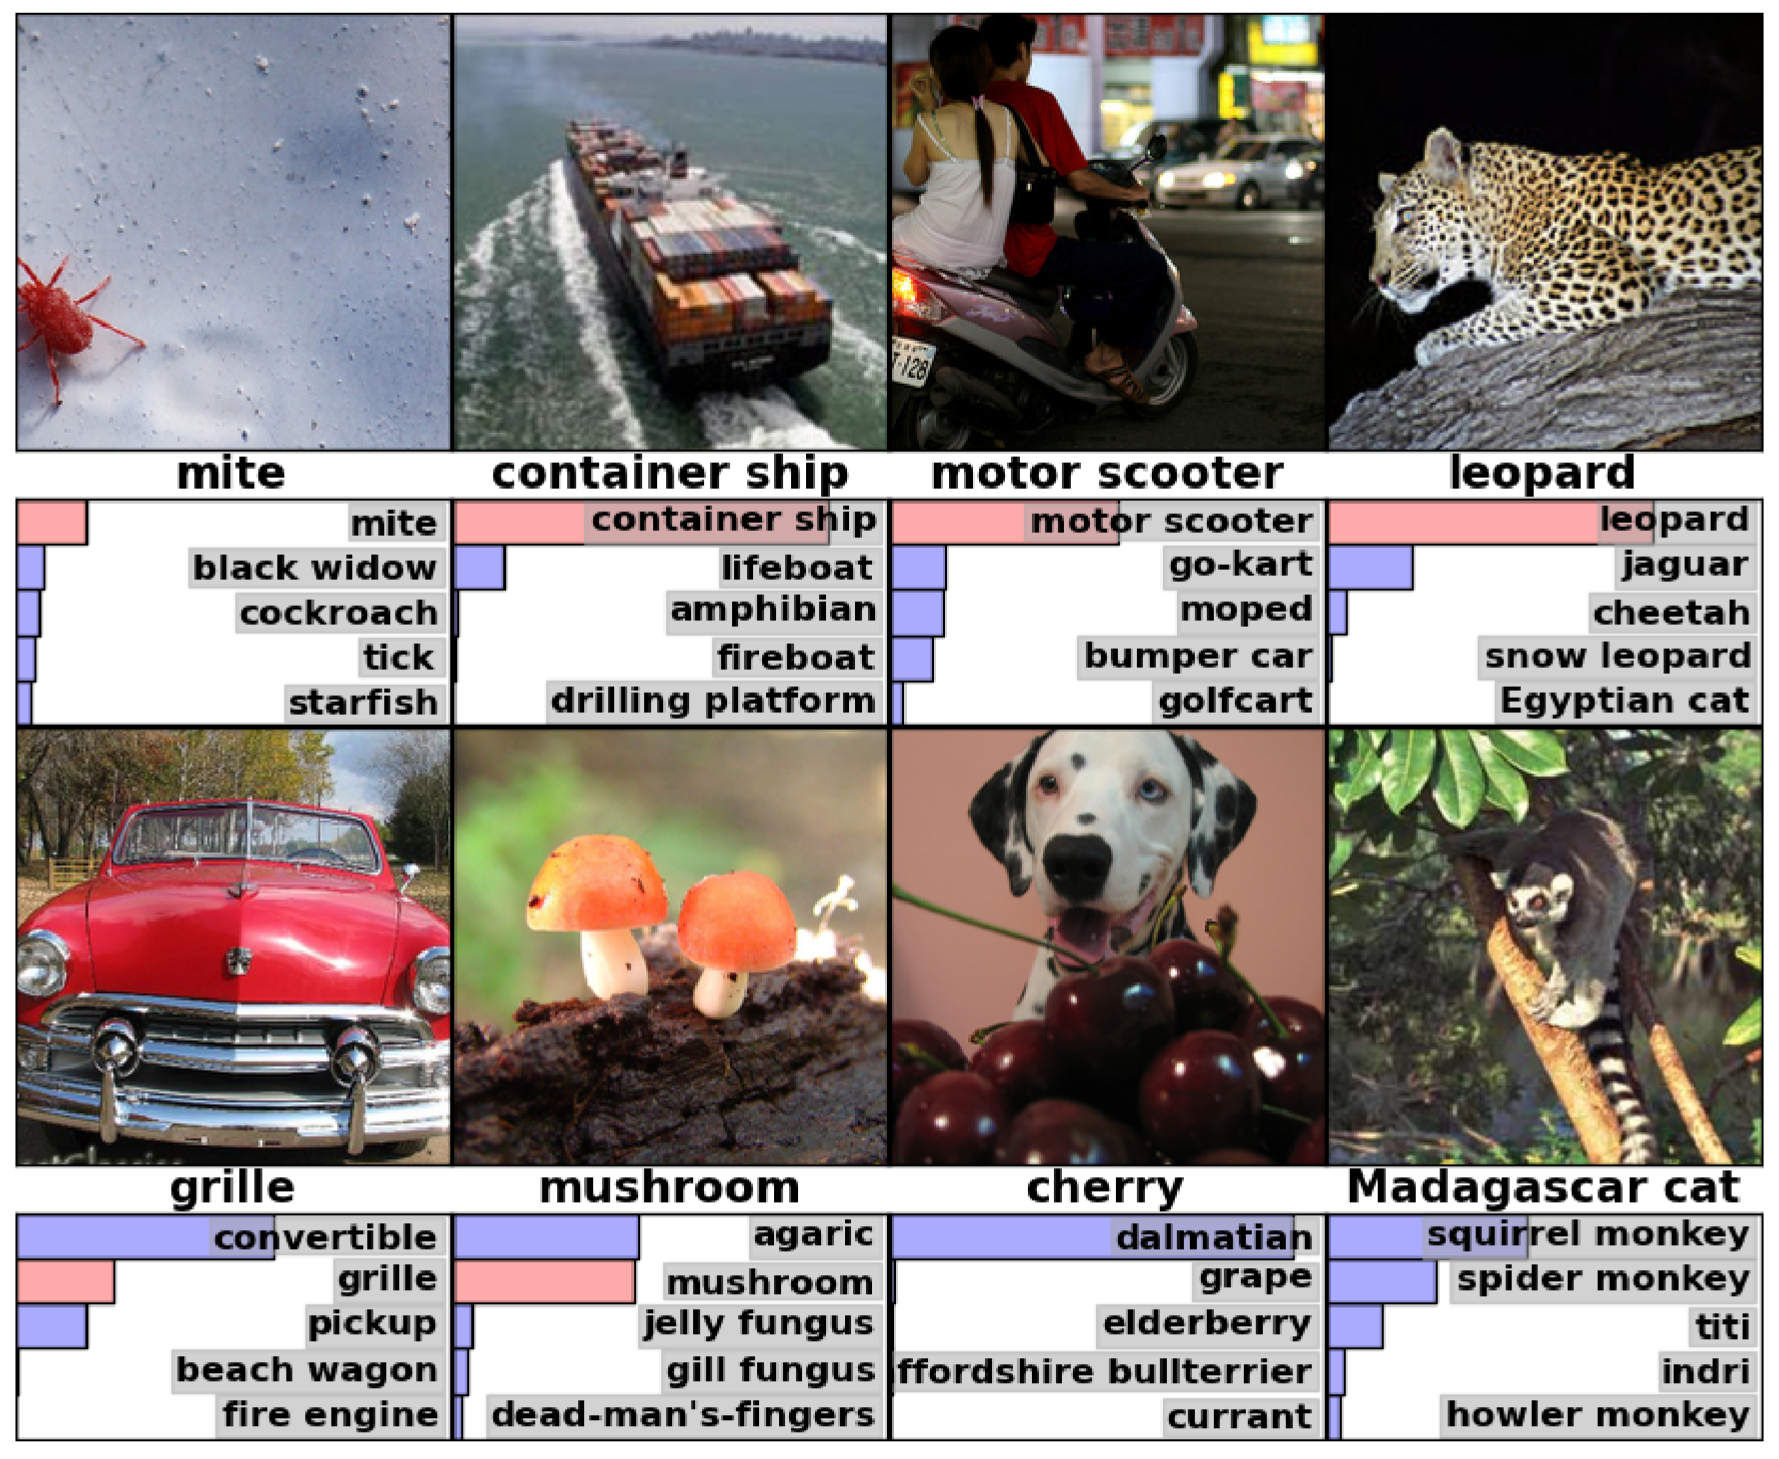
"ImageNet Classification with Deep Convolutional Neural Networks" by Alex Krizhevsky et al.

### Unsupervised learning - Outlier detection

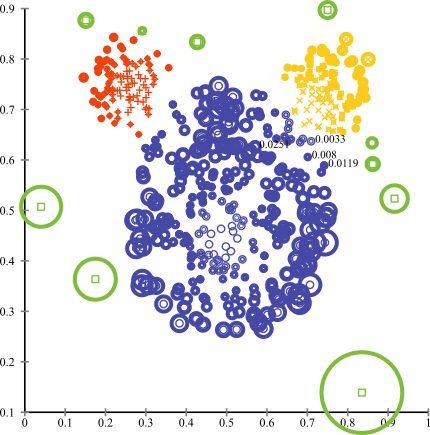

## Linear regression

Let's generate a synthetic dataset of data following the line $f(x) = 2x + 1$ with added random noise:

Input shape X: (100, 1)
Output shape y: (100, 1)


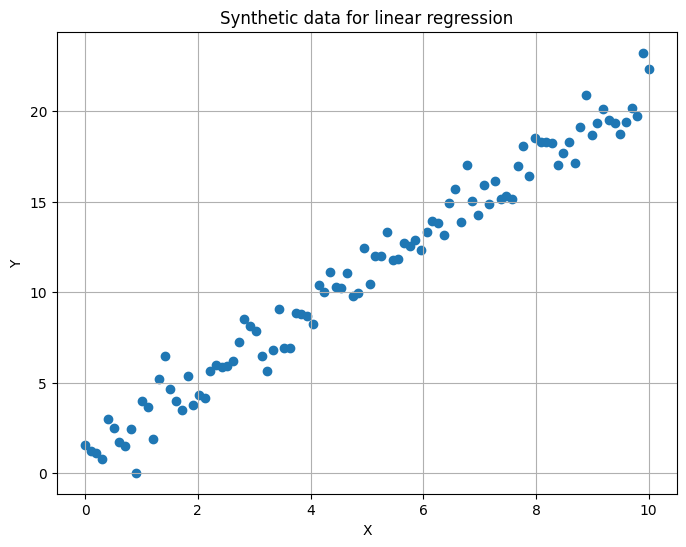

In [2]:
num_samples = 100
X = np.linspace(0, 10, num_samples).reshape(-1, 1) # Input vector
noise = np.random.normal(0, 1, X.shape)
y = 2 * X + 1 + noise # Linear relationship with added noise
print("Input shape X:", X.shape)
print("Output shape y:", y.shape)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data')
plt.title('Synthetic data for linear regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

## A mathematical model of linear regression

Linear regression is a simple dot product of the input data $\vec{x}$ with a vector of *weights* $\vec{w}$, shifted by a *bias* value $b$. 

$$ y(\vec{x}; \vec{w}, b)=x_1 w_1 + x_2 w_2 + \dots + x_d w_d + b= \sum_{i=1}^d x_i w_i + b = \vec{x}^T \vec{w} + b $$

### Implementation and the cost function

Linear regression is fitting a line $\hat{y} = \vec{w}^T \vec{x} + b$. To find the optimal values of $\vec{w}$ and $b$, we must minimise a cost function. Usually for linear regression we use the Mean Square Error (MSE) cost function:

In [3]:
def mean_squared_error(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

Let's simulate a prediction with random values of $\vec{w}$ and $b$:

In [4]:
W_init = 0.5
b_init = 4
y_pred_init = W_init * X + b_init

initial_cost = mean_squared_error(y, y_pred_init)
print("Initial cost (MSE) with random parameters:", initial_cost)

Initial cost (MSE) with random parameters: 42.66451751437223


## Visualising the regression line

Visualising the regression line will give us better insight into how the model fits the data:

In [5]:
def plot_regression_line(y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label='Data', color='blue')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

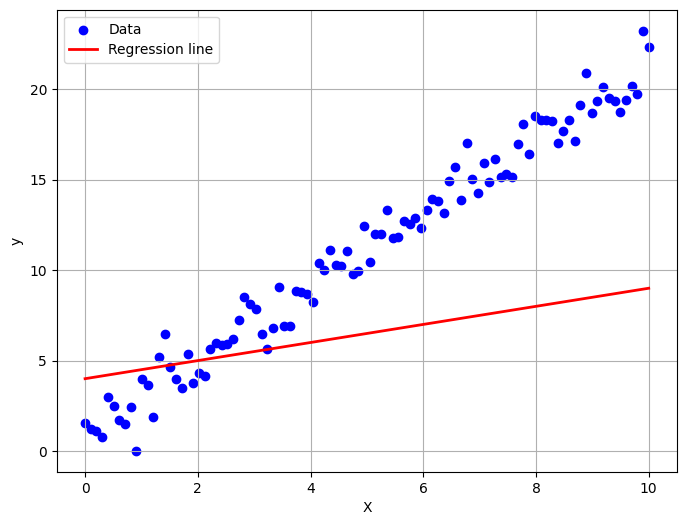

In [6]:
plot_regression_line(y_pred_init)

# Training a model with scikit-learn

Let's now use the scikit-learn library to create a linear regression model and fit (i. e. train) the model using our training set:

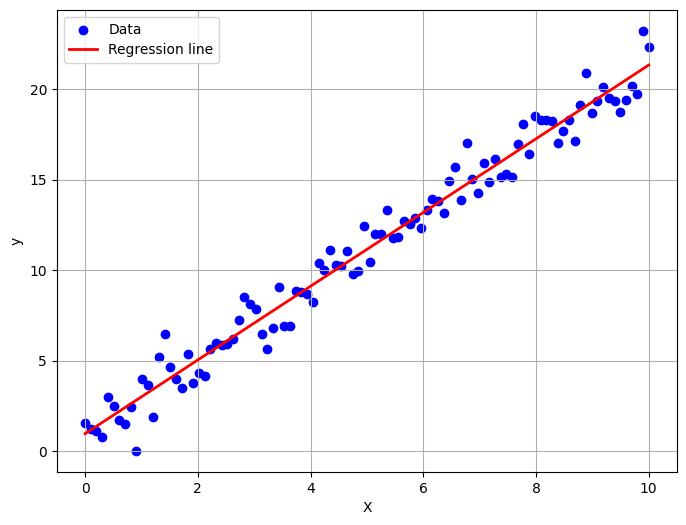

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
y_pred_optimal = model.predict(X)

plot_regression_line(y_pred_optimal)

## Evaluating simple models

Let's now evaluate our simple model. For regression, this mostly means tracking metrics like MSE or [$R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).

In [8]:
final_cost = mean_squared_error(y, y_pred_optimal)
print("Final cost (MSE) after training:", final_cost)
print("Optimal wieght (w):", model.coef_)
print("Optimal bias (b):", model.intercept_)

Final cost (MSE) after training: 0.9531144630328109
Optimal wieght (w): [[2.03764069]]
Optimal bias (b): [0.96051054]


In [9]:
from sklearn.metrics import r2_score

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2

mse_test, r2_test = evaluate_model(model, X, y)
print(f"MSE: {mse_test:.4f}, R-squared: {r2_test:.4f}")

MSE: 0.9531, R-squared: 0.9737


# Task 2 - Manual optimisation of linear regression

Recreate the scikit-learn model optimisation manually (without using sklearn).

## Solution

In [10]:
def manual_lr(train_x, train_y):
    train_x_with_bias = np.ones((train_x.size,1+1))
    train_x_with_bias[:,:-1] = train_x
    weights = np.linalg.inv(train_x_with_bias.T @ train_x_with_bias) @ train_x_with_bias.T @ train_y
    return weights[:-1], weights[-1]

In [11]:
manual_lr(X, y)

(array([[2.03764069]]), array([0.96051054]))